In [1]:
import sys
sys.path.append('../')
from fcc import *

In [ ]:
%time puck_180819_5 = pita.from_file(datafile='../inputs/puck_180819_5_mappedDGE.csv.gz', beadfile='../inputs/puck_180819_5_beads.csv', data_type='counts')

In [2]:
%time dge = pd.read_csv('../inputs/puck_180819_5_mappedDGE.csv.gz')

CPU times: user 2min 1s, sys: 12.2 s, total: 2min 13s
Wall time: 2min 16s


In [3]:
dge.set_index(keys='Row', drop=True, inplace=True)

In [4]:
dge.shape

(20009, 17027)

In [8]:
%time puck_180819_5 = couscous(data=dge, cells_axis=1, data_type='counts', labels=[0,0])

CPU times: user 1.02 ms, sys: 870 µs, total: 1.89 ms
Wall time: 2.18 ms


In [6]:
beads = pd.read_csv('../inputs/puck_180819_5_beads.csv', index_col=0)
beads.sort_values(axis=0, by=['xcoord','ycoord'], inplace=True)

In [8]:
beads.shape

(49856, 2)

In [9]:
beads = beads.drop(beads.index.difference(dge.columns))

In [10]:
beads.shape

(17027, 2)

In [11]:
%time puck_180819_5_slide = pita(data=dge, bead_locs=beads, cells_axis=1, labels=[0,0], data_type='counts')

CPU times: user 19.4 s, sys: 2.89 s, total: 22.3 s
Wall time: 23.3 s


In [14]:
puck_180819_5_slide.data['slide-seq'].max(axis=0)

xcoord    5089.007407
ycoord    4055.666667
dtype: float64

In [15]:
puck_180819_5_slide.data['slide-seq'].min(axis=0)

xcoord    551.754032
ycoord     25.295652
dtype: float64

In [16]:
%time puck_180819_5_slide.map_pixels()

CPU times: user 32.6 s, sys: 864 ms, total: 33.5 s
Wall time: 35.1 s


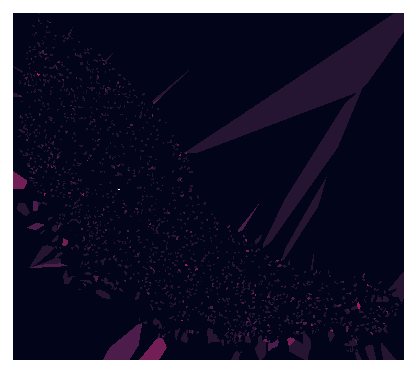

CPU times: user 4.48 s, sys: 441 ms, total: 4.92 s
Wall time: 4.89 s


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [17]:
%time puck_180819_5_slide.assemble_pita(data_type='counts', feature='Aldoc', plot_out=True)

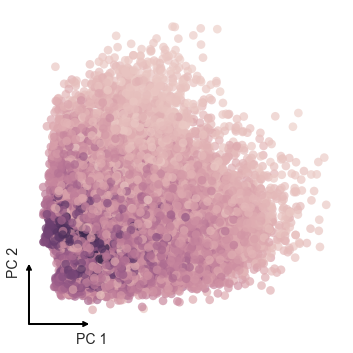

CPU times: user 57.2 s, sys: 25.7 s, total: 1min 22s
Wall time: 1min 27s


In [18]:
%%time 
puck_180819_5_slide.fcc_PCA(data_type='counts', n_components=10, transform='arcsinh')
puck_180819_5_slide.plot(data_type='PCA')

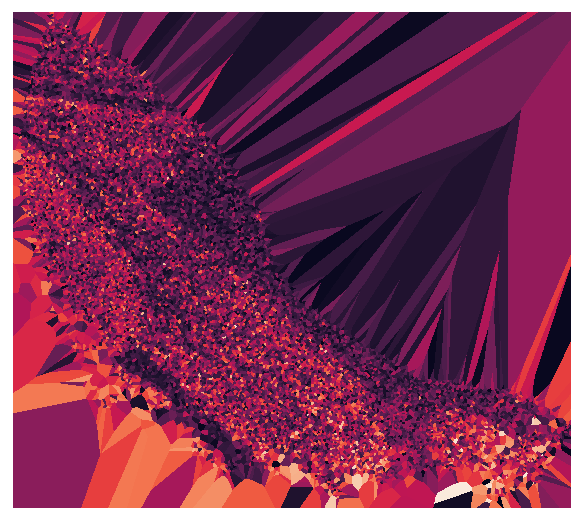

CPU times: user 4.63 s, sys: 336 ms, total: 4.97 s
Wall time: 4.82 s


In [21]:
%time PC1 = puck_180819_5_slide.assemble_pita(data_type='PCA', feature=0, plot_out=True, figsize=(10,10))

---
Read cerebellum dataset to `pita` object

In [2]:
%time cerebellum_slide = pita.from_file(datafile='../inputs/cerebellum_slice_rna.csv.gz', beadfile='../inputs/cerebellum_slice_beads.csv.gz', data_type='counts')

CPU times: user 56.8 s, sys: 4.33 s, total: 1min 1s
Wall time: 1min 2s


Create pixel map for cerebellum dataset to create images from

In [3]:
%time cerebellum_slide.map_pixels()

CPU times: user 2.55 s, sys: 71 ms, total: 2.62 s
Wall time: 2.66 s


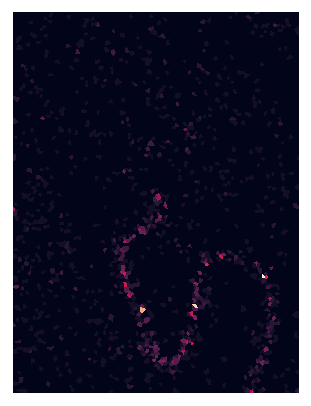

CPU times: user 1.14 s, sys: 48.5 ms, total: 1.19 s
Wall time: 1.09 s


In [4]:
%time aldoc = cerebellum_slide.assemble_pita(data_type='counts', feature='Aldoc', plot_out=True)

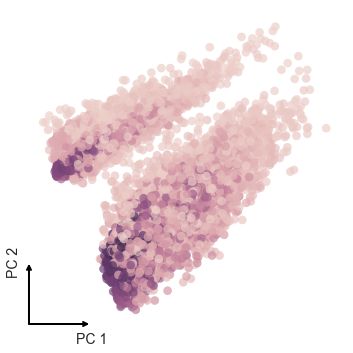

CPU times: user 16.8 s, sys: 3.27 s, total: 20.1 s
Wall time: 17.5 s


In [5]:
%%time 
cerebellum_slide.fcc_PCA(data_type='counts', n_components=10, transform='arcsinh')
cerebellum_slide.plot(data_type='PCA')

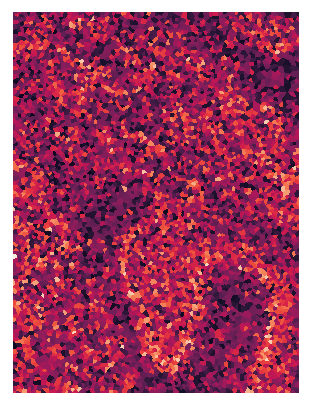

In [11]:
PC1 = cerebellum_slide.assemble_pita(data_type='PCA', feature=0, plot_out=True)

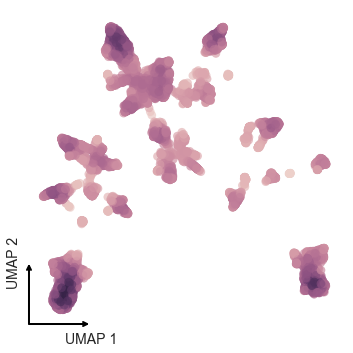

CPU times: user 26.5 s, sys: 1.13 s, total: 27.6 s
Wall time: 27.2 s


In [6]:
%%time 
cerebellum_slide.fcc_UMAP(data_type='PCA', perplexity=30, seed=18)
cerebellum_slide.plot(data_type='UMAP')

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ef14978>)

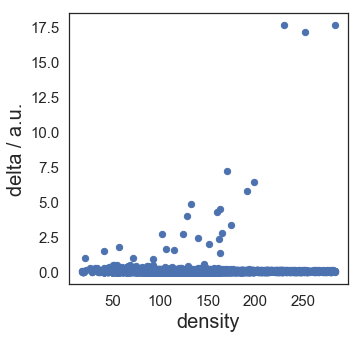

In [7]:
cerebellum_slide.clu['UMAP'].draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1249b1780>)

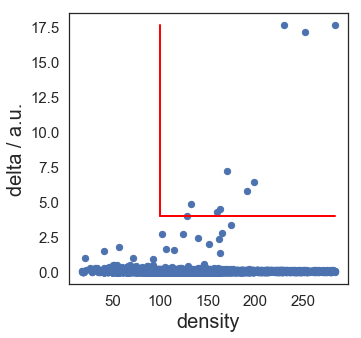

In [9]:
cerebellum_slide.clu['UMAP'].assign(100,4)
cerebellum_slide.clu['UMAP'].draw_decision_graph(min_density=cerebellum_slide.clu['UMAP'].min_density, min_delta=cerebellum_slide.clu['UMAP'].min_delta)

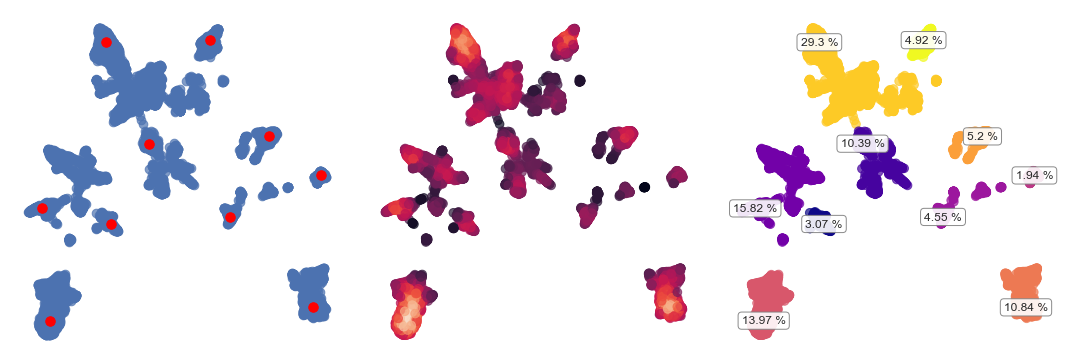

In [10]:
cerebellum_slide.plot_clusters(data_type='UMAP')

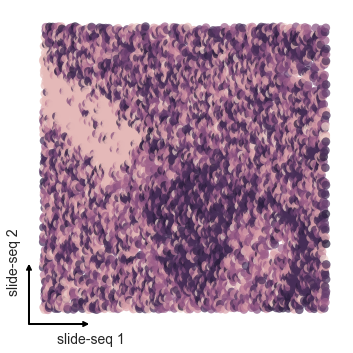

In [12]:
cerebellum_slide.plot(data_type='slide-seq', color=cerebellum_slide.clu['UMAP'].membership)

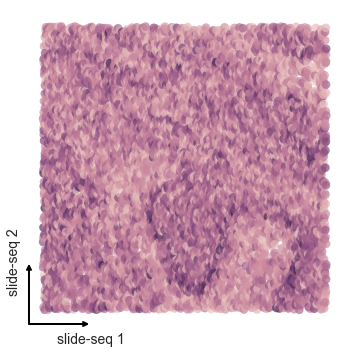

In [14]:
cerebellum_slide.plot(data_type='slide-seq', color=cerebellum_slide.data['PCA'][:,0])